# Correlation (상관관계)

`06_corr.ipynb`

## 정의
- 두 변수간에 서로 얼마나 함께 변하는지 정도를 나타내는 통계 개념
- 값의 범위는 : -1~ +1
    - +1: 완벽한 양의 상관관게 -> x가 증가하면 y도 비례해서 증가 : 키 - 몸무게
    - 0: 상관 없음
    - -1: 완벽한 음의 상관관계 -> x가 증가하면 y도 비례해서 감소 : 운동량 - 체지방률

## 상관 계수
두 변수간의 관계가 얼마나 강한지 측정하는 법 (대표)
- 피어슨 (Pearson) : 가장 많이 쓰임 연속 변수 선형 관계 측정
- 스피어맨 (Spearman) :  순위(랭크) 기반, 비 선형 관계, 이상치에 강함
- 켄달 (Kendall) : 순위 일관성 기반, 표본이 적을 때 안정적

In [31]:
%pip install -q kagglehub[pandas_datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('OnlineRetail.csv',encoding= 'ISO-8859-1')

In [ ]:
df.columns.

AttributeError: 'Index' object has no attribute 'count'

In [ ]:
missing_customers = df_clean['CustomerID'].isnull().sum()
print(f'CustomerID 결측값 제거: {missing_customers}건')
df_clean = df_clean.dropna(subset = ['CustomerID'])

# 취소 거래 분리 

=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)
CustomerID,135080,24.93
Description,1454,0.27


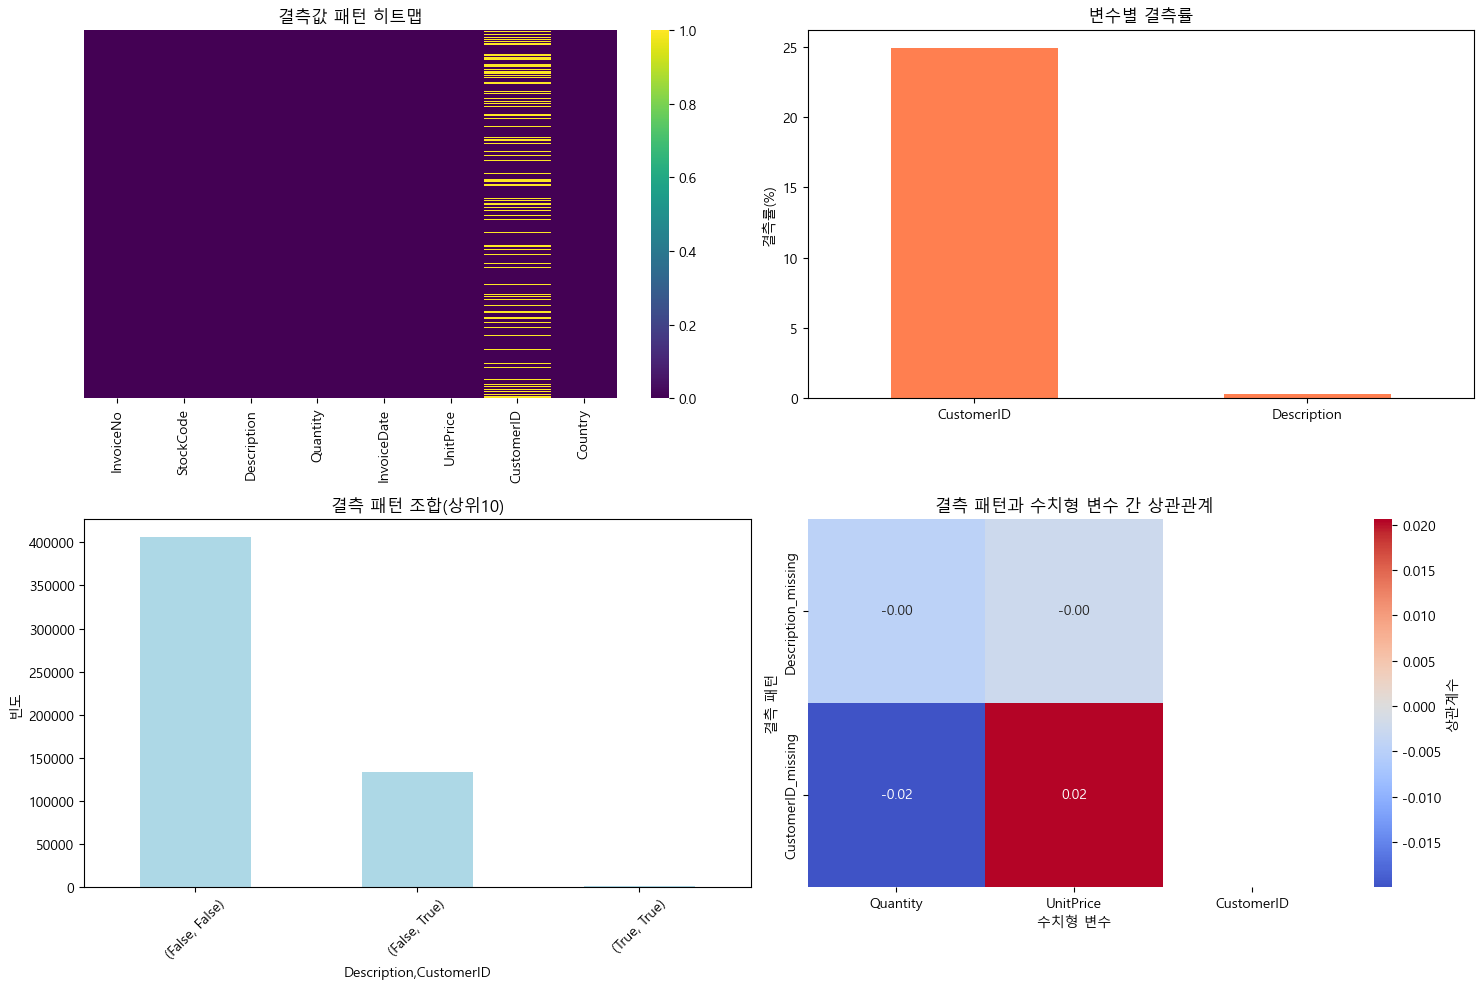

,결측수,결측률(%)
CustomerID,135080,24.93
Description,1454,0.27


In [33]:
from da_utils import outliers, patterns, profile
patterns.analyze_missing_patterns(df)

In [40]:
from da_utils import outliers, patterns, profile
outliers.outlier_detection(df, 0.999, iso_cont= 'auto', final_threshold=2)

AttributeError: module 'da_utils.outliers' has no attribute 'outlier_detection'

In [ ]:
print('전체거래', len(df))
print('고유 InvoiceNo',df['InvoiceNo'].nunique())
print('고유 고객수',df['CustomerID'].nunique())

전체거래 541909
고유 InvoiceNo 25900
고유 고객수 4372


In [1]:
outliers.outlier_detection(df, 0.999, iso_cont='auto', final_threshold=2)

NameError: name 'outliers' is not defined

In [ ]:
# 데이터 전처리
df_clean = df.copy()

# CustomerID 결측값 제거 (고객 단위 분석을 위해 필수)
missing_customers = df_clean['CustomerID'].isnull().sum()
print(f'CustomerID 결측값 제거: {missing_customers}건')
df_clean = df_clean.dropna(subset = ['CustomerID'])

#취소 거래 분리 (InvoiceNo 가 'C'로 시작)
cancel_mask = df_clean['InvoiceNo'].astype('str').str.startswith('C')
# 취소거래, 정상거래 분리
df_cancel = df_clean[cancel_mask]
df_clean = df_clean[~cancel_mask]
df_clean
print(f'취소거래 분리: {len(df_cancel)}건')
print(f'정상 거래: {len(df_clean)}건')

# 파생 변수 생성 (상관관계 분석)
# TotalAmount, InvoiceDate(DateTime), Year, Month, 
# DayOfWeek(숫자), Hour, DayName(글자)

df.head()
df.info()

CustomerID 결측값 제거: 135080건
취소거래 분리: 8905건
정상 거래: 397924건
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df_clean['CustomerID'].astype(str)
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InoviceDate'].dt.dayofweek
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['DayName'] = df_clean['InvoiceDate'].dt.day_name()
print('\n=== 이상값 확인 ===')
print(f'음수 수량: {(df_clean['Quantity']<0).sum()}')
# 양수 수량 & 양수 단가 데이터만 살리기
df_clean[(df_clean['Quantity']> 0)& (df_clean['UnitPrice']> 0)]
df_clean.info()


=== 이상값 확인 ===
음수 수량: 0
<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalAmount  397924 non-null  float64       
 9   InoviceDate  397924 non-null  datetime64[ns]
 10  Year         397924 non-null  int32         
 11  Month        397924 non-null  int32         
 12  DayOfWeek    397924 non-null  int32         
 13  Hour         397924 non-null  int32         
 14  DayName      397924 non-null  object        
dtypes: datetime64[

In [52]:
df_clean.count()

InvoiceNo      397884
StockCode      397884
Description    397884
Quantity       397884
InvoiceDate    397884
UnitPrice      397884
CustomerID     397884
Country        397884
TotalAmount    397884
Year           397884
Month          397884
DayOfWeek      397884
Hour           397884
DayName        397884
dtype: int64

In [41]:
# 데이터 전처리
df_clean = df.copy()

# CustomerID 결측값 제거 (고객 단위 분석을 위해 필수)
missing_customers = df_clean['CustomerID'].isnull().sum()
print(f'CustomerID 결측값 제거: {missing_customers}건')
df_clean = df_clean.dropna(subset=['CustomerID'])

# 취소 거래 분리 (InvoiceNo 가 'C' 로 시작)
cancel_mask = df_clean['InvoiceNo'].astype('str').str.startswith('C')
# 취소거래, 정상거래 분리
df_cancel = df_clean[cancel_mask]
df_clean = df_clean[~cancel_mask]
print(f'취소거래 분리: {len(df_cancel)}건')
print(f'정상 거래: {len(df_clean)}건')

# df_clean에 파생 변수 생성 (상관 관계 분석)
# TotalAmount, InvoiceDate(DateTime), Year, Month, DayOfWeek(숫자), Hour, DayName(글자), CustomerID(Str)
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int).astype(str)
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month']= df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek']= df_clean['InvoiceDate'].dt.dayofweek
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['DayName'] = df_clean['InvoiceDate'].dt.day_name()

print('\n=== 이상값 확인 ===')
print(f'음수 수량: {(df_clean['Quantity'] < 0).sum()}')
print(f'음수 단가: {(df_clean['UnitPrice'] < 0).sum()}')
print(f'0 단가: {(df_clean['UnitPrice'] == 0).sum()}')

# 양수 수량 & 양수 단가 데이터만 살리기
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

df_clean.info()

CustomerID 결측값 제거: 135080건
취소거래 분리: 8905건
정상 거래: 397924건

=== 이상값 확인 ===
음수 수량: 0
음수 단가: 0
0 단가: 40
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
 9   Year         397884 non-null  int32         
 10  Month        397884 non-null  int32         
 11  DayOfWeek    397884 non-null  int32         
 12  Hour         397884 non-null  int32         
 13  DayName      397884 non-null  object   

In [ ]:
print('=== 고객별 구매 패턴 특성 DF 생성 ===')
customer_stats = df.groupby('CustomerID').agg({
    'InvoiceNo' :
    'Quantity':[],
    'UnitPrice': '???',
    'TotalAmount': [],
    'StockCode': ???,
    'InvoiceDate' : [],


}).round(2)

#컬럼명 정리 (구매횟수 == F, 총구매액 == M)
customer_stats.columns = ['Frequency','총구매량','평균구매량','평균단가',
                          'Monetary','평균구매액','상품종류수','첫구매일','마지막구매일']
#구매 기간 및 주기 계산 (추가하기)
customer_stats['구매기간일수']
cutomer_stats['구매주기']
#RFM 분석 변수
customer_stats['R_score']
customer_stats['F_score']
customer_stats['M_score']
customer_stats['RFM_score'] = ??? # str(423) 식으로 RFM 코드 만들기
# 추가 정보 
customer_stats['평균장바구니크기']
customer_stats['거래당상품종류']

In [68]:
from datetime import datetime
customer_stats = df_clean.groupby('CustomerID').agg(
    # F(Frequency): 구매 횟수 (고유한 InvoiceNo의 개수)
    Frequency=('InvoiceNo', 'nunique'),
    # 총 구매량, 평균 구매량
    총구매량=('Quantity', 'sum'),
    평균구매량=('Quantity', 'mean'),
    # 평균 단가
    평균단가=('UnitPrice', 'mean'),
    # M(Monetary): 총 구매액, 평균 구매액
    Monetary=('TotalAmount', 'sum'),
    평균구매액=('TotalAmount', 'mean'),
    # 상품 종류 수
    상품종류수=('StockCode', 'nunique'),
    # R(Recency) 계산을 위한 첫 구매일과 마지막 구매일
    첫구매일=('InvoiceDate', 'min'),
    마지막구매일=('InvoiceDate', 'max')
).round(2)

# 컬럼명 정리
customer_stats.columns = [
    'Frequency', '총구매량', '평균구매량', '평균단가', 
    'Monetary', '평균구매액', '상품종류수', '첫구매일', '마지막구매일'
]

# 구매 기간 및 주기 계산
# 구매기간일수: 마지막 구매일로부터 첫 구매일 사이의 기간
customer_stats['구매기간일수'] = (customer_stats['마지막구매일'] - customer_stats['첫구매일']).dt.days + 1

# 구매주기: 구매기간일수 / (구매 횟수 - 1). 구매 횟수가 1인 경우 0으로 처리
customer_stats['구매주기'] = np.where(
    customer_stats['Frequency'] > 1, 
    customer_stats['구매기간일수'] / (customer_stats['Frequency'] - 1), 
    0
).round(2)

# RFM 분석 변수 계산
# Recency (최근성): 가장 최근 구매일로부터 오늘까지의 일수
analysis_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days = 1)
customer_stats['Recency'] = (analysis_date - customer_stats['마지막구매일']).dt.days
today = datetime.now().date()
# customer_stats['Recency'] = (pd.to_datetime(today) - customer_stats['마지막구매일']).dt.days



# 구매 기간 및 주기 계산 (추가하기)
customer_stats['구매기간일수'] = (customer_stats['마지막구매일'] - customer_stats['첫구매일']).dt.days + 1
customer_stats['구매주기'] = customer_stats['구매기간일수'] / customer_stats['Frequency']

# RFM 분석 변수
analysis_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
customer_stats['Recency'] = (analysis_date - customer_stats['마지막구매일']).dt.days


# RFM점수 (모두 5등급) (.qcut으로 5등분)
customer_stats['R_score'] = pd.qcut(customer_stats['Recency'], 5, labels=[5,4,3,2,1])
customer_stats['F_score'] = pd.qcut(customer_stats['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
customer_stats['M_score'] = pd.qcut(customer_stats['Monetary'], 5, labels=[1,2,3,4,5])
customer_stats['RFM_score'] = (customer_stats['R_score'].astype(str) + \
                                customer_stats['F_score'].astype(str) + \
                                customer_stats['M_score'].astype(str))
# 추가정보
customer_stats['평균장바구니크기'] = customer_stats['총구매량'] / customer_stats['Frequency']
customer_stats['거래당상품종류'] = customer_stats['상품종류수'] / customer_stats['Frequency']

# 가격 민감도 - 단가가 상대적으로 일관되게 유지되는가?
# CV = Coefficient of Variation (표준편차 / 평균) => 높으면, 다양한 가격대로 산다 / 낮으면, 특정 가격대에 고정적 구매
price_cv = df_clean.groupby('CustomerID')['UnitPrice'].agg(['mean', 'std'])
price_cv['가격변동성'] = (price_cv['std'] / price_cv['mean']).fillna(0)

customer_stats = customer_stats.merge(
    price_cv[['가격변동성']], # 두 DF 다 컬럼이 아닌 인덱스가 CustomerID
    left_index=True,   # customer_stats의 인덱스 기준으로 병합
    right_index=True   # price_cv의 인덱스 기준으로 병합
)

customer_stats

,Frequency,총구매량,평균구매량,평균단가,Monetary,평균구매액,상품종류수,첫구매일,마지막구매일,구매기간일수,구매주기,Recency,R_score,F_score,M_score,RFM_score,평균장바구니크기,거래당상품종류,가격변동성
CustomerID,,,,,,,,,,,,,,,,,,,
12346,1,74215,74215.00,1.04,77183.60,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.000000,326,1,1,5,115,74215.000000,1.000000,0.000000
12347,7,2458,13.51,2.64,4310.00,23.68,103,2010-12-07 14:57:00,2011-12-07 15:52:00,366,52.285714,2,5,5,5,555,351.142857,14.714286,0.853015
12348,4,2341,75.52,5.76,1797.24,57.98,22,2010-12-16 19:09:00,2011-09-25 13:13:00,283,70.750000,75,2,4,4,244,585.250000,5.500000,2.324492
12349,1,631,8.64,8.29,1757.55,24.08,73,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1.000000,19,4,1,4,414,631.000000,73.000000,4.225823
12350,1,197,11.59,3.84,334.40,19.67,17,2011-02-02 16:01:00,2011-02-02 16:01:00,1,1.000000,310,1,1,2,112,197.000000,17.000000,2.430180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,1,45,4.50,4.76,180.60,18.06,10,2011-03-07 09:52:00,2011-03-07 09:52:00,1,1.000000,278,1,2,1,121,45.000000,10.000000,0.518798
18281,1,54,7.71,5.62,80.82,11.55,7,2011-06-12 10:53:00,2011-06-12 10:53:00,1,1.000000,181,1,2,1,121,54.000000,7.000000,1.383397
18282,2,103,8.58,5.20,178.05,14.84,12,2011-08-05 13:35:00,2011-12-02 11:43:00,119,59.500000,8,5,3,1,531,51.500000,6.000000,0.937819


In [75]:
print('===기본 상관관계 분석 ===')

# 수치형 상관관계 분석용
numeric_cols =  ['Frequency', '총구매량', '평균구매량', '평균단가', 'Monetary', 
                   '평균구매액', '상품종류수', '구매기간일수', '구매주기', 'Recency', 
                  '평균장바구니크기', '거래당상품종류', '가격변동성']
correlation_data = customer_stats[numeric_cols]
#스피어만 상관계수

===기본 상관관계 분석 ===


AttributeError: 'list' object has no attribute 'ndim'

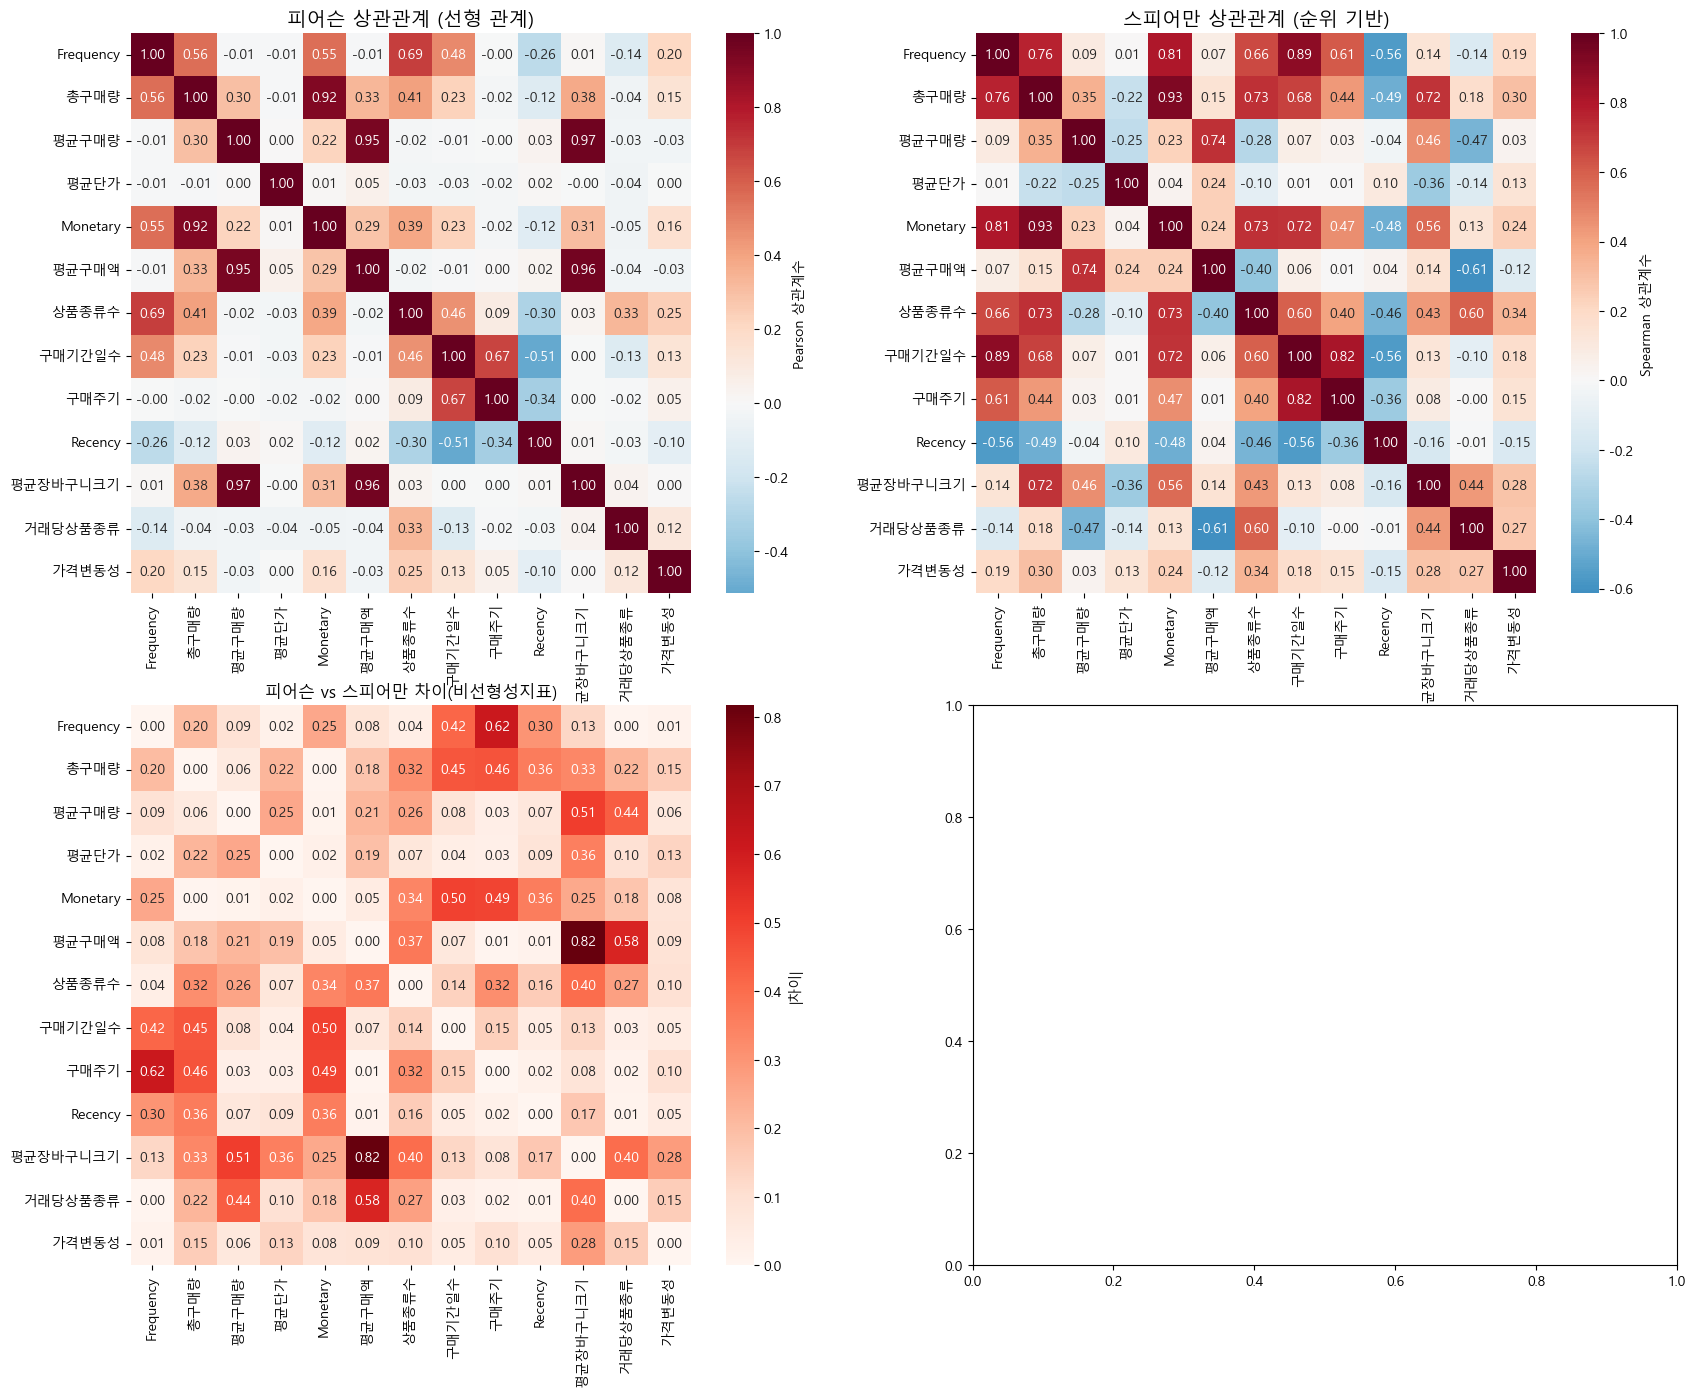

In [76]:
# 피어슨 상관관계 키 <=> 몸무게/ 온도 <=> 전력 같이 실제 값이 비례하는 경우 (값)
pearson_corr = correlation_data.corr(method='pearson')
# 스피어만 상관관계 - 시험 순위 <=> 대회순위/ 만족도 <-> 재구매의사 같이 서열형 관계에 적합 (순서)
spearman_corr = correlation_data.corr(method='spearman')

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

# 피어슨 상관관계 히트맵    
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a1, cbar_kws={'label': 'Pearson 상관계수'})
a1.set_title('피어슨 상관관계 (선형 관계)', fontsize=14)

# 스피어만 상관관계 히트맵
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a2, cbar_kws={'label': 'Spearman 상관계수'})
a2.set_title('스피어만 상관관계 (순위 기반)', fontsize=14)

corr_diff = abs(spearman_corr - pearson_corr)
sns.heatmap(corr_diff, annot=True, fmt='.2f', cmap='Reds',
             square=True, ax=a3, cbar_kws={'label': '|차이|'})
a3.set_title('피어슨 vs 스피어만 차이(비선형성지표)')

# 강한 상관관계 (|r| > 0.5) 네트워크
strong_corr = pearson_corr.copy()
strong_corr[abs(strong_corr)< 0.5] = 0
np.fill_diagonal([strong_corr.values],0)
sns.heatmap(strong_corr, annot = True, fmt ='.2f',cmap = 'RdBu_r',center = 0,
            square = True, ax = a4, cbar_kws = {'label':'강한 상관관계'})
a4.set_title('강한 상관관계 (|r|>0.5)',fontsize = 14)



In [83]:
# 주요 발견사항 요약
print('\n === 주요 상관관계 발견사항 ===')
# tkd
upper_triangle = np.triu(pearson_corr, k = 1)
# 가장 큰 값이 있는 인덱스
strong_positive = np.unravel_index(np.argmax(upper_triangle),upper_triangle.shape)
# 가장 강한 양의 상관관계
max_corr = pearson_corr.iloc[strong_positive]
print(f'가장 강한 양의 상관 관계: {max_corr:.3f}')
print(f' {pearson_corr.index[strong_positive[0]]} <-> {pearson_corr.index[strong_positive[1]]}')

strong_negative = np.unravel_index(np.argmin(upper_triangle),upper_triangle.shape)
min_corr = pearson_corr.iloc[strong_negative]

print(f'가장 강한 음의 상관 관계: {min_corr:.3f}')
print(f'{pearson_corr.index[strong_negative[0]]}<->{pearson_corr.index[strong_negative[1]]}')


 === 주요 상관관계 발견사항 ===
가장 강한 양의 상관 관계: 0.970
 평균구매량 <-> 평균장바구니크기
가장 강한 음의 상관 관계: -0.514
구매기간일수<->Recency


In [92]:
print('전체 거래', len(df))
print('고유 InvoiceNo',df['InvoiceNo'].nunique())
print('고유 고객수',df['CustomerID'].nunique())

전체 거래 541909
고유 InvoiceNo 25900
고유 고객수 4372


In [101]:
df_clean.count()

InvoiceNo      397884
StockCode      397884
Description    397884
Quantity       397884
InvoiceDate    397884
UnitPrice      397884
CustomerID     397884
Country        397884
TotalAmount    397884
Year           397884
Month          397884
DayOfWeek      397884
Hour           397884
DayName        397884
dtype: int64

In [98]:
outliers.outlier_detection(df, 0.999, iso_cont= 'auto',final_threshold= 2)

AttributeError: module 'da_utils.outliers' has no attribute 'outlier_detection'